<a href="https://colab.research.google.com/github/AleksanderDanilian/study/blob/main/%D0%9B%D0%B5%D1%81%D0%BE%D0%B7%D0%B0%D0%B3%D0%BE%D1%82%D0%BE%D0%B2%D0%BA%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Всякое разное

In [ ]:
image = cv2.imread('/content/0.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(image_gray, 110, 255, cv2.THRESH_BINARY)

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


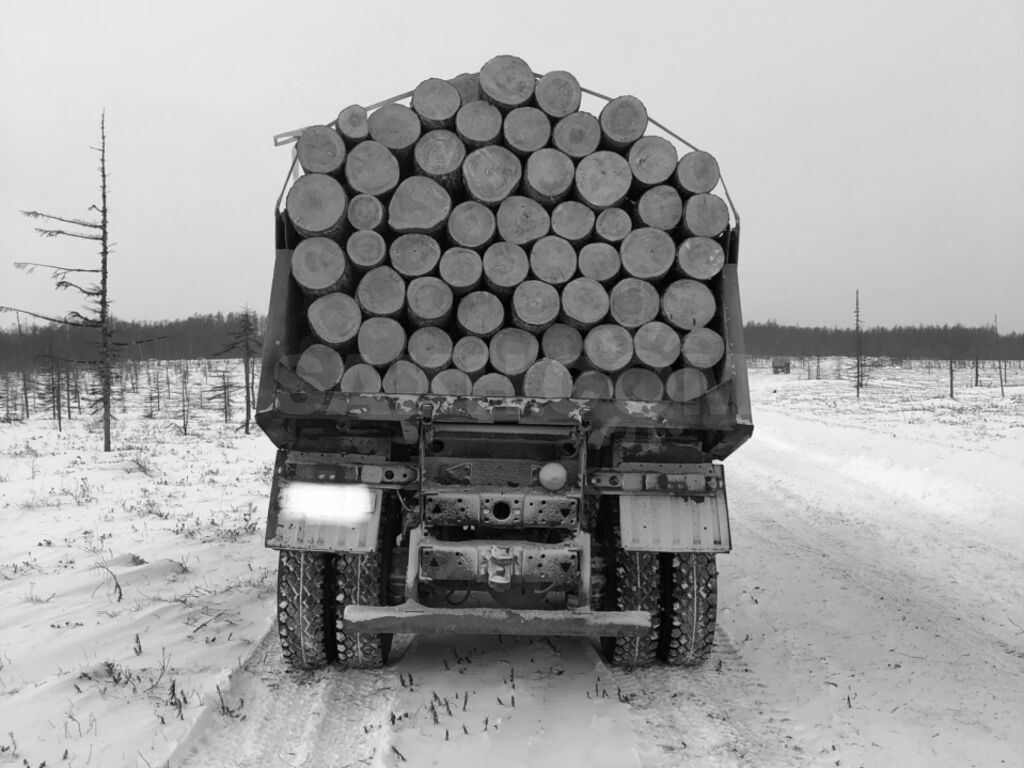

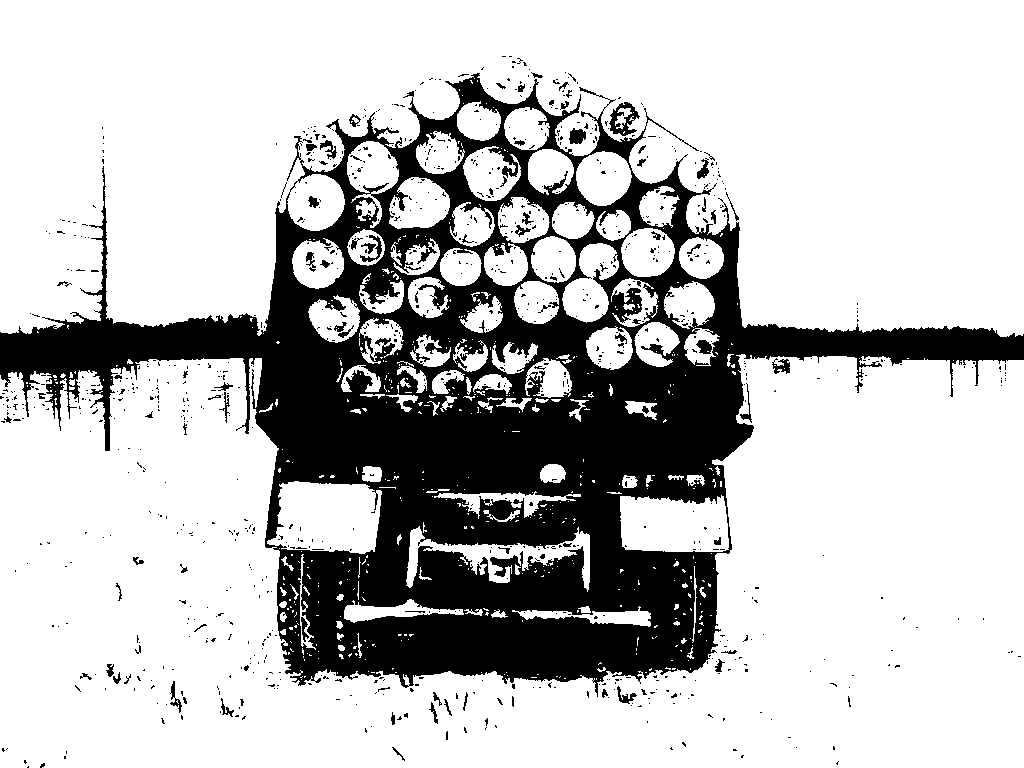

In [ ]:
cv2_imshow(image_gray)
cv2_imshow(thresh)
# cv2_imshow(contours)

In [ ]:
import numpy as np

circles = cv2.HoughCircles(thresh, cv2.HOUGH_GRADIENT, 1.1, 100)
# ensure at least some circles were found
if circles is not None:
	# convert the (x, y) coordinates and radius of the circles to integers
	circles = np.round(circles[0, :]).astype("int")
	# loop over the (x, y) coordinates and radius of the circles
	for (x, y, r) in circles:
		# draw the circle in the output image, then draw a rectangle
		# corresponding to the center of the circle
		cv2.circle(image_gray, (x, y), r, (0, 255, 0), 4)
		cv2.rectangle(image_gray, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
	# show the output image
	cv2_imshow(np.hstack([image_gray, thresh]))

In [ ]:
# import skimage
# print(skimage.__version__)
# import skimage.segmentation as seg

image_slic = seg.slic(image,n_segments=580)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  """


In [ ]:
cv2_imshow(image_slic)

In [ ]:
import matplotlib.pyplot as plt
import skimage.color as color

def image_show(image, nrows=1, ncols=1):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 14))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    return fig, ax

image_show(color.label2rgb(image_slic, image, kind = 'avg'))

In [ ]:
!pip install pixellib

import pixellib
import imgaug

In [ ]:
cd /content/

/content


In [ ]:
import shutil

shutil.rmtree('/content/Nature/Nature')

In [ ]:
import zipfile
with zipfile.ZipFile('/content/Nature.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

# Пример Mask_RCNN

In [ ]:
!git clone https://github.com/matterport/Mask_RCNN.git

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 125.23 MiB | 39.21 MiB/s, done.
Resolving deltas: 100% (565/565), done.


In [ ]:
# Вроде как работает для демо - ноутбука. НЕ ТРОГАТЬ! :)

!pip uninstall tensorflow
!pip install tensorflow-gpu==1.15
%tensorflow_version 1.x
import tensorflow
print(tensorflow.version)
!pip uninstall keras-nightly
!pip uninstall keras
!pip install h5py==2.10.0
!pip install q keras==2.1.0 #2.3.1

In [ ]:
# !pip install mrcnn

In [ ]:
!pip install -r '/content/Mask_RCNN/requirements.txt'

In [ ]:
%cd /content/Mask_RCNN

!python /content/Mask_RCNN/setup.py install

In [ ]:
# !pip install 'h5py==2.10.0' --force-reinstall

In [6]:
# %tensorflow_version 1.x

In [1]:
import keras
import tensorflow

print(keras.__version__)
print(tensorflow.__version__)

Using TensorFlow backend.


2.1.0
1.15.0


In [2]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt
import os

# Root directory of the project
ROOT_DIR = os.path.abspath("/content/Mask_RCNN/")

# Import Mask RCNN
# sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
# Import COCO config
# print(sys.path.append(os.path.join(ROOT_DIR, "samples/coco/")))  # To find local version

from Mask_RCNN.samples.coco import coco

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "images")



In [ ]:
IMAGE_DIR

'/content/Mask_RCNN/images'

In [ ]:
class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()

In [5]:
import h5py
print(h5py.__version__)

2.10.0


In [6]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Load weights trained on MS-COCO
model.load_weights(COCO_MODEL_PATH, by_name=True)






Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.








In [7]:
# COCO Class names
# Index of the class in the list is its ID. For example, to get ID of
# the teddy bear class, use: class_names.index('teddy bear')
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

Processing 1 images
image                    shape: (334, 500, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


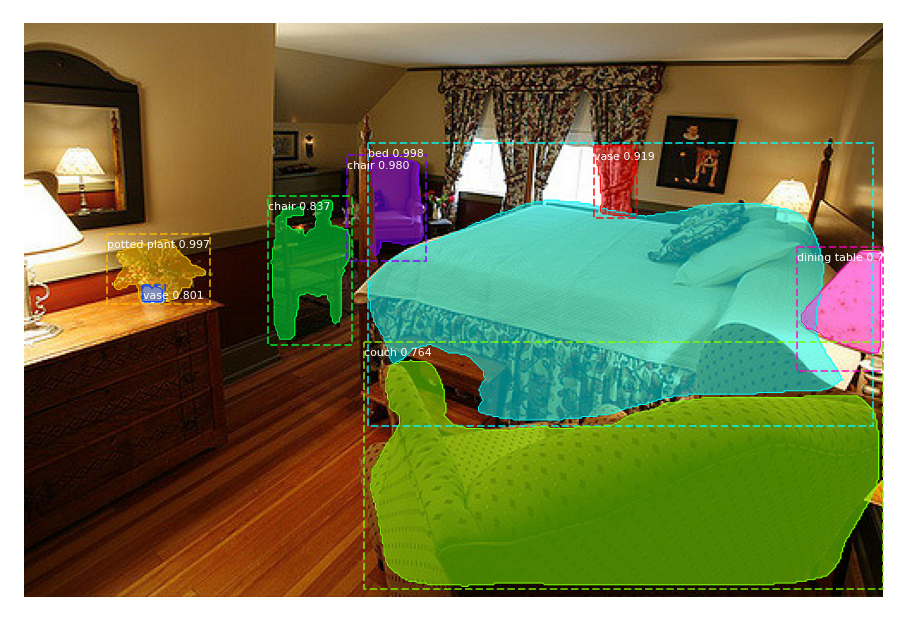

In [8]:
# Load a random image from the images folder
file_names = next(os.walk(IMAGE_DIR))[2]
image = skimage.io.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))

# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])

In [ ]:
r['masks'].shape

(427, 640, 10)

In [ ]:
r['masks'][410][10]

array([False, False, False, False, False,  True, False, False, False,
       False])

In [ ]:
# Подсчет площади

square = [0 for i in range((r['masks'].shape[2]))]

for i in range(r['masks'].shape[2]):
  for pixel_x in range(r['masks'].shape[1]):
    for pixel_y in range(r['masks'].shape[0]):
      if r['masks'][pixel_y][pixel_x][i] == True:
        square[i] += 1

In [ ]:
print(r['class_ids'])
print(r['rois'])
print(square)

# Учим свою модель

In [ ]:
%cd /content/Mask_RCNN
!python /content/Mask_RCNN/setup.py install

In [ ]:
"""
Mask R-CNN
Train on the toy Balloon dataset and implement color splash effect.
Copyright (c) 2018 Matterport, Inc.
Licensed under the MIT License (see LICENSE for details)
Written by Waleed Abdulla
------------------------------------------------------------
Usage: import the module (see Jupyter notebooks for examples), or run from
       the command line as such:
    # Train a new model starting from pre-trained COCO weights
    python3 balloon.py train --dataset=/path/to/balloon/dataset --weights=coco
    # Resume training a model that you had trained earlier
    python3 balloon.py train --dataset=/path/to/balloon/dataset --weights=last
    # Train a new model starting from ImageNet weights
    python3 balloon.py train --dataset=/path/to/balloon/dataset --weights=imagenet
    # Apply color splash to an image
    python3 balloon.py splash --weights=/path/to/weights/file.h5 --image=<URL or path to file>
    # Apply color splash to video using the last weights you trained
    python3 balloon.py splash --weights=last --video=<URL or path to file>
"""

import os
import sys
import json
import datetime
import numpy as np
import skimage.draw

# Root directory of the project
ROOT_DIR = os.getcwd()
print(ROOT_DIR)
if ROOT_DIR.endswith("samples/balloon"):
    # Go up two levels to the repo root
    ROOT_DIR = os.path.dirname(os.path.dirname(ROOT_DIR))

# Import Mask RCNN
os.chdir('/content/Mask_RCNN/mrcnn')
print(os.getcwd())
from config import Config
import utils
import model as modellib

# Path to trained weights file
COCO_WEIGHTS_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")

# Directory to save logs and model checkpoints, if not provided
# through the command line argument --logs
DEFAULT_LOGS_DIR = os.path.join(ROOT_DIR, "logs")

############################################################
#  Configurations
############################################################


class BalloonConfig(Config):
    """Configuration for training on the toy  dataset.
    Derives from the base Config class and overrides some values.
    """
    # Give the configuration a recognizable name
    NAME = "balloon"

    # We use a GPU with 12GB memory, which can fit two images.
    # Adjust down if you use a smaller GPU.
    IMAGES_PER_GPU = 2

    # Number of classes (including background)
    NUM_CLASSES = 1 + 1  # Background + baloon

    # Number of training steps per epoch
    STEPS_PER_EPOCH = 100

    # Skip detections with < 90% confidence
    DETECTION_MIN_CONFIDENCE = 0.9


############################################################
#  Dataset
############################################################

class BalloonDataset(utils.Dataset):

    def load_balloon(self, dataset_dir, subset):
        """Load a subset of the Balloon dataset.
        dataset_dir: Root directory of the dataset.
        subset: Subset to load: train or val
        """
        # Add classes. We have only one class to add.
        self.add_class("balloon", 1, "balloon")
        
        # Train or validation dataset?
        assert subset in ["train", "val"]
        dataset_dir = os.path.join(dataset_dir, subset)

        # Load annotations
        # VGG Image Annotator saves each image in the form:
        # { 'filename': '28503151_5b5b7ec140_b.jpg',
        #   'regions': {
        #       '0': {
        #           'region_attributes': {},
        #           'shape_attributes': {
        #               'all_points_x': [...],
        #               'all_points_y': [...],
        #               'name': 'polygon'}},
        #       ... more regions ...
        #   },
        #   'size': 100202
        # }
        # We mostly care about the x and y coordinates of each region
        annotations = json.load(open(os.path.join(dataset_dir, "via_region_data.json")))
        annotations = list(annotations.values())  # don't need the dict keys

        # The VIA tool saves images in the JSON even if they don't have any
        # annotations. Skip unannotated images.
        annotations = [a for a in annotations if a['regions']]

        # Add images
        for a in annotations:
            # Get the x, y coordinaets of points of the polygons that make up
            # the outline of each object instance. There are stores in the
            # shape_attributes (see json format above)
            polygons = [r['shape_attributes'] for r in a['regions'].values()]

            # load_mask() needs the image size to convert polygons to masks.
            # Unfortunately, VIA doesn't include it in JSON, so we must read
            # the image. This is only managable since the dataset is tiny.
            image_path = os.path.join(dataset_dir, a['filename'])
            image = skimage.io.imread(image_path)
            height, width = image.shape[:2]

            self.add_image(
                "balloon",
                image_id=a['filename'],  # use file name as a unique image id
                path=image_path,
                width=width, height=height,
                polygons=polygons)

    def load_mask(self, image_id):
        """Generate instance masks for an image.
       Returns:
        masks: A bool array of shape [height, width, instance count] with
            one mask per instance.
        class_ids: a 1D array of class IDs of the instance masks.
        """
        # If not a balloon dataset image, delegate to parent class.
        image_info = self.image_info[image_id]
        if image_info["source"] != "balloon":
            return super(self.__class__, self).load_mask(image_id)

        # Convert polygons to a bitmap mask of shape
        # [height, width, instance_count]
        info = self.image_info[image_id]
        mask = np.zeros([info["height"], info["width"], len(info["polygons"])],
                        dtype=np.uint8)
        for i, p in enumerate(info["polygons"]):
            # Get indexes of pixels inside the polygon and set them to 1
            rr, cc = skimage.draw.polygon(p['all_points_y'], p['all_points_x'])
            mask[rr, cc, i] = 1

        # Return mask, and array of class IDs of each instance. Since we have
        # one class ID only, we return an array of 1s
        return mask, np.ones([mask.shape[-1]], dtype=np.int32)

    def image_reference(self, image_id):
        """Return the path of the image."""
        info = self.image_info[image_id]
        if info["source"] == "balloon":
            return info["path"]
        else:
            super(self.__class__, self).image_reference(image_id)


def train(model):
    """Train the model."""
    # Training dataset.
    dataset_train = BalloonDataset()
    dataset_train.load_balloon(args.dataset, "train")
    dataset_train.prepare()

    # Validation dataset
    dataset_val = BalloonDataset()
    dataset_val.load_balloon(args.dataset, "val")
    dataset_val.prepare()

    # *** This training schedule is an example. Update to your needs ***
    # Since we're using a very small dataset, and starting from
    # COCO trained weights, we don't need to train too long. Also,
    # no need to train all layers, just the heads should do it.
    print("Training network heads")
    model.train(dataset_train, dataset_val,
                learning_rate=config.LEARNING_RATE,
                epochs=30,
                layers='heads')


def color_splash(image, mask):
    """Apply color splash effect.
    image: RGB image [height, width, 3]
    mask: instance segmentation mask [height, width, instance count]
    Returns result image.
    """
    # Make a grayscale copy of the image. The grayscale copy still
    # has 3 RGB channels, though.
    gray = skimage.color.gray2rgb(skimage.color.rgb2gray(image)) * 255
    # We're treating all instances as one, so collapse the mask into one layer
    mask = (np.sum(mask, -1, keepdims=True) >= 1)
    # Copy color pixels from the original color image where mask is set
    if mask.shape[0] > 0:
        splash = np.where(mask, image, gray).astype(np.uint8)
    else:
        splash = gray
    return splash


def detect_and_color_splash(model, image_path=None, video_path=None):
    assert image_path or video_path

    # Image or video?
    if image_path:
        # Run model detection and generate the color splash effect
        print("Running on {}".format(args.image))
        # Read image
        image = skimage.io.imread(args.image)
        # Detect objects
        r = model.detect([image], verbose=1)[0]
        # Color splash
        splash = color_splash(image, r['masks'])
        # Save output
        file_name = "splash_{:%Y%m%dT%H%M%S}.png".format(datetime.datetime.now())
        skimage.io.imsave(file_name, splash)
    elif video_path:
        import cv2
        # Video capture
        vcapture = cv2.VideoCapture(video_path)
        width = int(vcapture.get(cv2.CAP_PROP_FRAME_WIDTH))
        height = int(vcapture.get(cv2.CAP_PROP_FRAME_HEIGHT))
        fps = vcapture.get(cv2.CAP_PROP_FPS)

    #     # Define codec and create video writer
    #     file_name = "splash_{:%Y%m%dT%H%M%S}.avi".format(datetime.datetime.now())
    #     vwriter = cv2.VideoWriter(file_name,
    #                               cv2.VideoWriter_fourcc(*'MJPG'),
    #                               fps, (width, height))

    #     count = 0
    #     success = True
    #     while success:
    #         print("frame: ", count)
    #         # Read next image
    #         success, image = vcapture.read()
    #         if success:
    #             # OpenCV returns images as BGR, convert to RGB
    #             image = image[..., ::-1]
    #             # Detect objects
    #             r = model.detect([image], verbose=0)[0]
    #             # Color splash
    #             splash = color_splash(image, r['masks'])
    #             # RGB -> BGR to save image to video
    #             splash = splash[..., ::-1]
    #             # Add image to video writer
    #             vwriter.write(splash)
    #             count += 1
    #     vwriter.release()
    # print("Saved to ", file_name)


/content/Mask_RCNN/mrcnn
/content/Mask_RCNN/mrcnn


In [ ]:
############################################################
#  Training
############################################################

if __name__ == '__main__':
    import argparse

    # Parse command line arguments
    parser = argparse.ArgumentParser(
        description='Train Mask R-CNN to detect balloons.')
    parser.add_argument("command",
                        metavar="<command>",
                        help="'train' or 'splash'")
    parser.add_argument('--dataset', required=False,
                        metavar="/path/to/balloon/dataset/",
                        help='Directory of the Balloon dataset')
    parser.add_argument('--weights', required=True,
                        metavar="/path/to/weights.h5",
                        help="Path to weights .h5 file or 'coco'")
    parser.add_argument('--logs', required=False,
                        default=DEFAULT_LOGS_DIR,
                        metavar="/path/to/logs/",
                        help='Logs and checkpoints directory (default=logs/)')
    parser.add_argument('--image', required=False,
                        metavar="path or URL to image",
                        help='Image to apply the color splash effect on')
    parser.add_argument('--video', required=False,
                        metavar="path or URL to video",
                        help='Video to apply the color splash effect on')
    args = parser.parse_args()

    # Validate arguments
    if args.command == "train":
        assert args.dataset, "Argument --dataset is required for training"
    elif args.command == "splash":
        assert args.image or args.video,\
               "Provide --image or --video to apply color splash"

    print("Weights: ", args.weights)
    print("Dataset: ", args.dataset)
    print("Logs: ", args.logs)

    # Configurations
    if args.command == "train":
        config = BalloonConfig()
    else:
        class InferenceConfig(BalloonConfig):
            # Set batch size to 1 since we'll be running inference on
            # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
            GPU_COUNT = 1
            IMAGES_PER_GPU = 1
        config = InferenceConfig()
    config.display()

    # Create model
    if args.command == "train":
        model = modellib.MaskRCNN(mode="training", config=config,
                                  model_dir=args.logs)
    else:
        model = modellib.MaskRCNN(mode="inference", config=config,
                                  model_dir=args.logs)

    # Select weights file to load
    if args.weights.lower() == "coco":
        weights_path = COCO_WEIGHTS_PATH
        # Download weights file
        if not os.path.exists(weights_path):
            utils.download_trained_weights(weights_path)
    elif args.weights.lower() == "last":
        # Find last trained weights
        weights_path = model.find_last()[1]
    elif args.weights.lower() == "imagenet":
        # Start from ImageNet trained weights
        weights_path = model.get_imagenet_weights()
    else:
        weights_path = args.weights

    # Load weights
    print("Loading weights ", weights_path)
    if args.weights.lower() == "coco":
        # Exclude the last layers because they require a matching
        # number of classes
        model.load_weights(weights_path, by_name=True, exclude=[
            "mrcnn_class_logits", "mrcnn_bbox_fc",
            "mrcnn_bbox", "mrcnn_mask"])
    else:
        model.load_weights(weights_path, by_name=True)

    # Train or evaluate
    if args.command == "train":
        train(model)
    elif args.command == "splash":
        detect_and_color_splash(model, image_path=args.image,
                                video_path=args.video)
    else:
        print("'{}' is not recognized. "
              "Use 'train' or 'splash'".format(args.command))

In [ ]:
!unzip /content/Mask_RCNN/samples/balloon/balloon_dataset.zip -d /content/Mask_RCNN/samples/balloon/

In [16]:
%cd /content/Mask_RCNN/samples/balloon

!python3 balloon.py train --dataset=balloon --weights=coco

/content/Mask_RCNN/samples/balloon
Using TensorFlow backend.
Weights:  coco
Dataset:  balloon
Logs:  /content/Mask_RCNN/logs

Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     2
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.3
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 2
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, '

In [17]:
!python /content/Mask_RCNN/samples/balloon/balloon.py splash --weights=last --image=/content/Mask_RCNN/samples/balloon/шарики.jpg

Using TensorFlow backend.
Weights:  last
Dataset:  None
Logs:  /content/Mask_RCNN/logs

Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.3
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_lo

In [ ]:
%cd /content/Mask_RCNN

!python /content/Mask_RCNN/setup.py install

In [21]:
import json
with open('/content/Mask_RCNN/samples/forest/forest/train/via_region_data.json') as f:
    d = json.load(f)
    print(json.dumps(d, indent=2))

{
  "info": {
    "year": 2022,
    "version": "1.0",
    "description": "VIA project exported to COCO format using VGG Image Annotator (http://www.robots.ox.ac.uk/~vgg/software/via/)",
    "contributor": "",
    "url": "http://www.robots.ox.ac.uk/~vgg/software/via/",
    "date_created": "Wed Jan 12 2022 16:56:04 GMT+0300 (\u041c\u043e\u0441\u043a\u0432\u0430, \u0441\u0442\u0430\u043d\u0434\u0430\u0440\u0442\u043d\u043e\u0435 \u0432\u0440\u0435\u043c\u044f)"
  },
  "images": [
    {
      "id": 0,
      "width": 1024,
      "height": 768,
      "file_name": "0.jpg",
      "license": 0,
      "date_captured": ""
    },
    {
      "id": 1,
      "width": 800,
      "height": 533,
      "file_name": "1.jpg",
      "license": 0,
      "date_captured": ""
    },
    {
      "id": 2,
      "width": 960,
      "height": 720,
      "file_name": "2.jpg",
      "license": 0,
      "date_captured": ""
    },
    {
      "id": 3,
      "width": 971,
      "height": 643,
      "file_name": "3.jpg"